In [74]:
from djccx.inp.inp import inp
from djccx.frd.readfrd import readfrd
from loadsavejson.loadjson import loadjson

In [75]:
inp_f = inp("output/ccx/main.inp")

In [76]:
frd = readfrd("output/ccx/main.frd")

In [77]:
params =  loadjson("output/ccx/params.json")

In [78]:
trajs = params["mesh"]["trajs"]
ry    = params["mesh"]["radius"]
rgeo  = params["mesh"]["r"]

In [79]:
import numpy as np


y0 =frd["data"]["y"].values
Ly0 = np.max(y0) - np.min(y0)

epsilon = []
for ifrd in frd["data_blocks"]:
    y = ifrd["y"] + ifrd["D2"]
    y = y.values
    dy = np.max(y) - np.min(y)
    epsilon.append( np.abs(dy - Ly0)/Ly0 )
epsilon = np.array(epsilon)


In [80]:
nodes_results = inp_f.setResults(frd)

In [81]:
params["mesh"].keys()

dict_keys(['files', 'inp_file', 'trajs', 'radius', 'r', 'results'])

In [82]:
import numpy as np

In [83]:
from trajs.meshyarn import meshyarn,frdsteps2yarns
from matplotlib import pyplot as plt

In [84]:
yarns = meshyarn(trajs, ry)
yarns_by_steps = frdsteps2yarns(yarns,frd)

In [85]:
len(yarns_by_steps)

5

In [86]:
yarns_by_steps[2]["yarns"][0]["P1"]

array([ 6.70749378, 10.31148894, 15.69791256, 13.52208844, 15.45190681,
       16.74874311, 12.30234542, 10.93161535, 12.81204852, 11.82643659,
        5.86156504])

In [87]:
yarns_by_steps[0]["yarns"][0]["P1_max"]

np.float64(0.0)

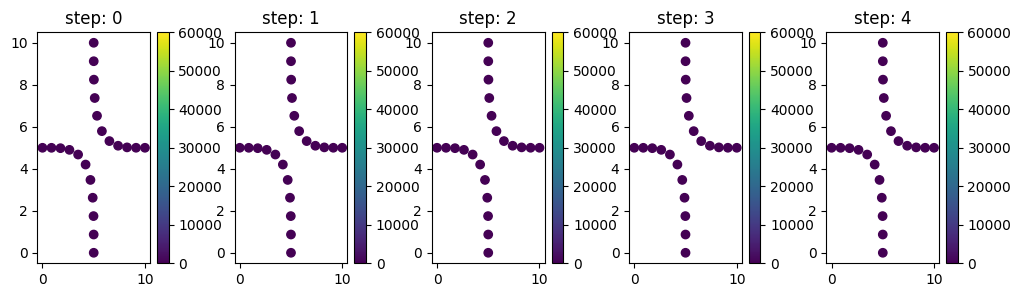

In [88]:
#plot scater 3d 
fig = plt.figure()
fig.set_size_inches(12, 3)
# subplot 
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(yarns_by_steps)):
    plt.subplot(1,len(yarns_by_steps),i+1)
    yarns_st = yarns_by_steps[i]["yarns"]
    yarns = [ {"P1":d["P1"] , "traj":d["traj_sample"]} for d in yarns_st]

    for y in yarns:
        plt.scatter(y["traj"][:,0],y["traj"][:,1],c = y["P1"], cmap = "viridis",vmin = 0, vmax = 6e4)
        
    plt.title("step: "+str(i))

    colorbar = plt.colorbar()

In [89]:
from validation.experimental import experimental
experimental_data = experimental()

In [90]:
experimental_data

,Name,Tensión maxima (MPa),Alargamiento máximo (%),Módulo Young (MPa)
0,WT1-2,211.6,10.1,2794.4
1,WT2-2,167.8,7.6,2919.3
2,WT3-2,122.5,7.4,2597.6
3,WT4-2,143.3,8.5,2612.1
4,WT5-2,161.4,7.4,3115.6
5,TFP1-1,279.1,12.3,2885.5
6,TFP2-1,153.4,8.8,2258.5
7,TFP3-1,137.1,8.7,2000.4
8,TFP4-1,184.4,9.5,2451.4
9,TFP5-1,100.0,9.0,1626.6


Text(0, 0.5, '$P1_{max}$ [MPa]')

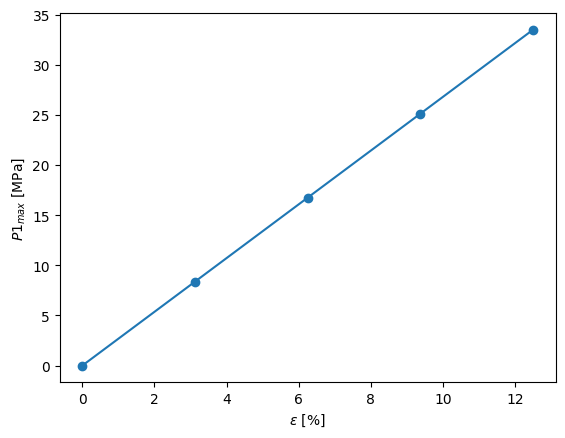

In [91]:
P1_max_list = [ y["P1_max"] for y in yarns_by_steps]

plt.figure()
plt.plot(100*epsilon,P1_max_list,'o-')
plt.xlabel(r"$\varepsilon$ [%]")
plt.ylabel(r"$P1_{max}$ [MPa]")

In [92]:
230*0.015

3.4499999999999997

In [93]:
from validation.experimental import experimental

In [94]:
data = experimental()

In [95]:
data

,Name,Tensión maxima (MPa),Alargamiento máximo (%),Módulo Young (MPa)
0,WT1-2,211.6,10.1,2794.4
1,WT2-2,167.8,7.6,2919.3
2,WT3-2,122.5,7.4,2597.6
3,WT4-2,143.3,8.5,2612.1
4,WT5-2,161.4,7.4,3115.6
5,TFP1-1,279.1,12.3,2885.5
6,TFP2-1,153.4,8.8,2258.5
7,TFP3-1,137.1,8.7,2000.4
8,TFP4-1,184.4,9.5,2451.4
9,TFP5-1,100.0,9.0,1626.6


In [96]:
lim_data_strength = [ data["Tensión maxima (MPa)"].min(), 
                      data["Tensión maxima (MPa)"].max() ]

lim_data_epsilon  = [ data["Alargamiento máximo (%)"].min(),
                      data["Alargamiento máximo (%)"].max() ]

(-0.625, 13.125)

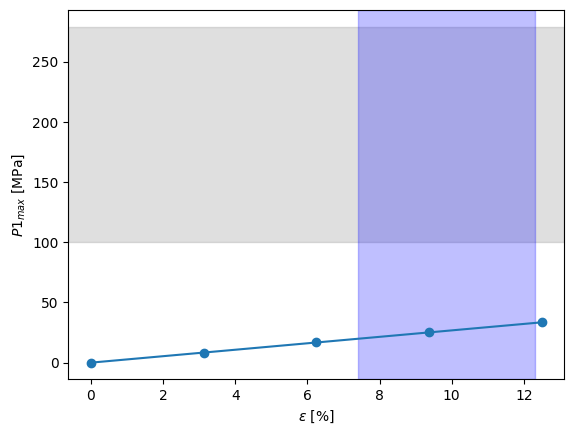

In [107]:
P1_max_list = [ y["P1_max"] for y in yarns_by_steps]

plt.figure()
plt.plot(100*epsilon,P1_max_list,'o-')
plt.xlabel(r"$\varepsilon$ [%]")
plt.ylabel(r"$P1_{max}$ [MPa]")
# draw fill zone 
xlim_plot = plt.xlim()
plt.fill_between([xlim_plot[0],xlim_plot[1]],
                 lim_data_strength[0],
                 lim_data_strength[1],
                 color = "gray",alpha = 0.25)

ylim_plot = plt.ylim()
plt.fill_between([lim_data_epsilon[0],lim_data_epsilon[1]],
                 ylim_plot[0],ylim_plot[1],
                 color = "blue",alpha = 0.25)

plt.ylim(ylim_plot)
plt.xlim(xlim_plot)

Text(0, 0.5, 'Módulo Young (MPa)')

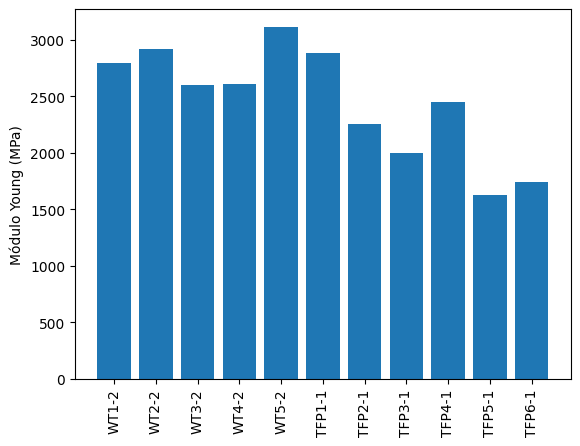

In [43]:
fig = plt.figure()
plt.bar(x=data["Name"],height=data["Módulo Young (MPa)"])
# rotate ticks
plt.xticks(rotation=90);
plt.ylabel("Módulo Young (MPa)")

KeyError: 'disks'

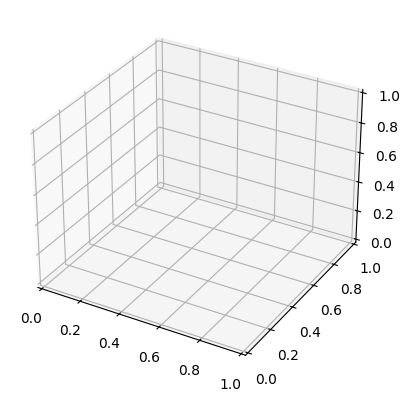

In [44]:
# plot 3d 

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for j in range(len(yarns)):
    yarn = yarns[j]
    disks = yarn["disks"]
    for i in range(len(disks)):

        disk = disks[i]["disk"]
            
        ax.scatter(disk[0,:],disk[1,:],disk[2,:], 
                   c=disks[i]["P1"], cmap='viridis')
    t1 = yarns[j]["traj"]
    plt.plot(t1[:,0],t1[:,1],t1[:,2], 'r.')
    # scatter disks

# ratio equal
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()
xl = np.abs(np.diff(xlim))[0]
yl = np.abs(np.diff(ylim))[0]
zl = np.abs(np.diff(zlim))[0]
# ratio aspect
plt.aspect = 1

In [ ]:
yarns[0]["disks"][0]["disk"]

array([[-1.36163902e-09, -1.36163902e-09, -1.36163902e-09,
        -1.36163902e-09, -1.36163902e-09, -1.36163902e-09,
        -1.15215610e-09, -1.15215610e-09, -1.15215610e-09,
        -1.15215610e-09, -1.15215610e-09, -1.15215610e-09,
        -1.15215610e-09, -1.15215610e-09, -1.15215610e-09,
        -1.15215610e-09, -9.42673169e-10, -9.42673169e-10,
        -9.42673169e-10, -9.42673169e-10, -9.42673169e-10,
        -9.42673169e-10, -9.42673169e-10, -9.42673169e-10,
        -9.42673169e-10, -9.42673169e-10, -9.42673169e-10,
        -9.42673169e-10, -7.33190243e-10, -7.33190243e-10,
        -7.33190243e-10, -7.33190243e-10, -7.33190243e-10,
        -7.33190243e-10, -7.33190243e-10, -7.33190243e-10,
        -7.33190243e-10, -7.33190243e-10, -7.33190243e-10,
        -7.33190243e-10, -5.23707316e-10, -5.23707316e-10,
        -5.23707316e-10, -5.23707316e-10, -5.23707316e-10,
        -5.23707316e-10, -5.23707316e-10, -5.23707316e-10,
        -5.23707316e-10, -5.23707316e-10, -5.23707316e-1

In [ ]:
disk.shape

(3, 164)

In [ ]:
frd["data"]

,node,x,y,z,D1,D2,D3,SXX,SYY,SZZ,...,EYZ,EZX,F1,F2,F3,STR(%),S_von_mises,P1,P2,P3
node,,,,,,,,,,,,,,,,,,,,,
1,1,0.0000,5.0000,1.0000,-0.012595,1.0,-0.00014,3.590790e-09,-1.328460e-08,-6.670830e-09,...,-1.432960e-12,-8.503140e-13,4.463480e-10,-4.433060e-10,-2.124900e-10,58.9103,3.060846e-08,1.058260e-08,-2.546957e-09,-2.440028e-08
2,2,0.4617,4.9999,1.0000,-0.012595,1.0,-0.00014,-1.633200e-08,-1.594460e-08,3.000730e-10,...,-9.869010e-13,-6.110300e-13,-1.350860e-10,1.812370e-10,-9.998420e-12,59.9360,2.152175e-08,3.440424e-09,-1.540561e-08,-2.001134e-08
3,3,0.9234,4.9985,1.0000,-0.012595,1.0,-0.00014,-4.939920e-08,-8.008340e-09,7.064250e-10,...,-9.754410e-13,-6.004800e-13,-3.277080e-11,-2.937980e-10,7.964930e-11,42.8890,4.799314e-08,2.703518e-09,-9.263762e-09,-5.014087e-08
4,4,1.3850,4.9926,1.0000,-0.012595,1.0,-0.00014,-6.340230e-08,-1.141410e-08,-1.283710e-08,...,-1.499880e-12,-8.980790e-13,1.108350e-10,3.048110e-10,-4.206790e-10,36.4133,5.319130e-08,-1.017685e-08,-1.283107e-08,-6.464557e-08
5,5,1.8464,4.9766,1.0000,-0.012595,1.0,-0.00014,-1.119370e-07,-6.635890e-09,1.517540e-09,...,-1.461790e-12,-9.346770e-13,-3.680210e-11,2.738360e-10,2.613320e-10,27.5295,1.117055e-07,3.755169e-09,-7.611485e-09,-1.131990e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24315,24315,5.5122,9.7695,1.2255,-0.012595,1.0,-0.00014,1.397850e-09,5.499820e-09,9.804560e-10,...,-3.817390e-14,-8.677480e-13,-5.713230e-12,1.802150e-13,1.603010e-11,18.8251,5.523192e-09,5.504723e-09,3.175029e-09,-8.016260e-10
24316,24316,5.4451,9.7695,1.0443,-0.012595,1.0,-0.00014,-8.319140e-10,4.244170e-09,1.601310e-09,...,-3.931490e-14,-1.278090e-12,1.208110e-12,2.589020e-12,-5.671100e-12,20.2073,6.691170e-09,4.248789e-09,3.535308e-09,-2.770531e-09
24317,24317,5.9404,4.8740,1.0720,-0.012595,1.0,-0.00014,1.160500e-08,1.546200e-08,-1.771010e-08,...,4.296390e-12,4.458840e-13,1.096050e-12,-1.676500e-12,3.703910e-12,56.2652,4.028986e-08,2.600866e-08,3.845290e-09,-2.049705e-08
